In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('car_loan.csv', on_bad_lines='skip', low_memory = False)
df.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;;;;;;;;
0,83,68376217.0,NaN,23100.0,23100.0,23100.0,60 months,20.50,618.46,E,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
1,111,68377006.0,NaN,6000.0,6000.0,6000.0,36 months,7.91,187.77,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
2,323,68566571.0,NaN,3600.0,3600.0,3600.0,36 months,11.48,118.68,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
3,432,68596423.0,NaN,15000.0,15000.0,15000.0,36 months,9.17,478.19,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
4,437,68386728.0,NaN,10800.0,10800.0,10800.0,60 months,8.49,221.53,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
5,"443,68338676,,6000.0,6000.0,6000.0, 36 months,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,490,68526473.0,NaN,3500.0,3500.0,3500.0,36 months,9.80,112.61,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
7,605,68536967.0,NaN,12250.0,12250.0,12250.0,60 months,9.17,255.31,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
8,619,68494601.0,NaN,24000.0,24000.0,24000.0,36 months,7.49,746.44,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;
9,661,68616576.0,NaN,18000.0,18000.0,18000.0,60 months,10.78,389.40,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;;;;;;;;


In [2]:
df.dtypes


Unnamed: 0                  object
id                         float64
member_id                  float64
loan_amnt                  float64
funded_amnt                float64
                            ...   
settlement_status           object
settlement_date             object
settlement_amount          float64
settlement_percentage      float64
settlement_term;;;;;;;;     object
Length: 152, dtype: object

In [3]:
str_columns = df.select_dtypes(include ='object').columns
for cols in str_columns:
    mode_value = df[cols].mode()[0]
    df[cols].fillna(mode_value, inplace=True)
str_columns

Index(['Unnamed: 0', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_term;;;;;;;;'],
      dtype='object')

In [4]:
df.tail(100)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;;;;;;;;
19890,2253082,91255021.0,NaN,10000.0,10000.0,10000.0,36 months,16.99,356.48,D,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
19891,2253142,91128806.0,NaN,5000.0,5000.0,5000.0,36 months,13.49,169.66,C,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
19892,2253213,91118831.0,NaN,5000.0,5000.0,5000.0,36 months,8.99,158.98,B,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
19893,2253234,91255106.0,NaN,3000.0,3000.0,3000.0,36 months,8.59,94.83,A,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
19894,2253383,90987140.0,NaN,3000.0,3000.0,3000.0,36 months,14.49,103.25,C,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19985,2260265,90521136.0,NaN,28000.0,28000.0,28000.0,36 months,15.59,978.74,C,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
19986,2260331,90156180.0,NaN,12000.0,12000.0,12000.0,60 months,12.79,271.75,C,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
19987,2260355,90158512.0,NaN,12000.0,12000.0,12000.0,36 months,14.49,413.00,C,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;
19988,2260374,90266004.0,NaN,28000.0,28000.0,28000.0,36 months,16.99,998.14,D,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Apr-2018,NaN,NaN,;;;;;;;;


In [5]:
quantiles = df['loan_amnt'].quantile([0.33, 0.66])

def categorize_loan_amount(loan_amount):
    if loan_amount <= quantiles.iloc[0]:
        return 'Low'
    elif loan_amount <= quantiles.iloc[1]:
        return 'Medium'
    else:
        return 'High'

df['Loan_Grade'] = df['loan_amnt'].apply(categorize_loan_amount)

df = df.applymap(lambda x: x.lower() if type(x) == str else x)

In [6]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;;;;;;;;,Loan_Grade
0,83,68376217.0,NaN,23100.0,23100.0,23100.0,60 months,20.50,618.46,e,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,high
1,111,68377006.0,NaN,6000.0,6000.0,6000.0,36 months,7.91,187.77,a,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,medium
2,323,68566571.0,NaN,3600.0,3600.0,3600.0,36 months,11.48,118.68,b,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,low
3,432,68596423.0,NaN,15000.0,15000.0,15000.0,36 months,9.17,478.19,b,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,high
4,437,68386728.0,NaN,10800.0,10800.0,10800.0,60 months,8.49,221.53,b,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19985,2260265,90521136.0,NaN,28000.0,28000.0,28000.0,36 months,15.59,978.74,c,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,high
19986,2260331,90156180.0,NaN,12000.0,12000.0,12000.0,60 months,12.79,271.75,c,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,high
19987,2260355,90158512.0,NaN,12000.0,12000.0,12000.0,36 months,14.49,413.00,c,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,high
19988,2260374,90266004.0,NaN,28000.0,28000.0,28000.0,36 months,16.99,998.14,d,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,;;;;;;;;,high


In [7]:
# Выбор строк, где процентная ставка (int_rate) ниже средней по всем ставкам
below_average_interest_rate = df[df['int_rate'] < df['int_rate'].mean()]

# Нахождение самого часто встречающегося штата (addr_state) среди записей о займах
most_common_state = df['addr_state'].mode()[0]

# Вывод результатов
print("Строки, где процентная ставка ниже средней по всем ставкам:")
print(below_average_interest_rate)

print("\nСамый часто встречающийся штат среди записей о займах:")
print(most_common_state)

Строки, где процентная ставка ниже средней по всем ставкам:
      Unnamed: 0          id  member_id  loan_amnt  funded_amnt  \
1            111  68377006.0        NaN     6000.0       6000.0   
2            323  68566571.0        NaN     3600.0       3600.0   
3            432  68596423.0        NaN    15000.0      15000.0   
4            437  68386728.0        NaN    10800.0      10800.0   
6            490  68526473.0        NaN     3500.0       3500.0   
...          ...         ...        ...        ...          ...   
19976    2259415  90288854.0        NaN    10000.0      10000.0   
19977    2259420  90481788.0        NaN     5000.0       5000.0   
19980    2259742  90724549.0        NaN     6000.0       6000.0   
19981    2259940  90481753.0        NaN     2500.0       2500.0   
19989    2260582  89874675.0        NaN    35000.0      35000.0   

       funded_amnt_inv        term  int_rate  installment grade  ...  \
1               6000.0   36 months      7.91       187.77     a

In [8]:
df.rename(columns={'settlement_term;;;;;;;;': 'settlement_term'}, inplace=True)
df['settlement_term'].replace(';;;;;;;;', np.nan, inplace=True)


In [9]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Loan_Grade
0,83,68376217.0,NaN,23100.0,23100.0,23100.0,60 months,20.50,618.46,e,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,high
1,111,68377006.0,NaN,6000.0,6000.0,6000.0,36 months,7.91,187.77,a,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,medium
2,323,68566571.0,NaN,3600.0,3600.0,3600.0,36 months,11.48,118.68,b,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,low
3,432,68596423.0,NaN,15000.0,15000.0,15000.0,36 months,9.17,478.19,b,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,high
4,437,68386728.0,NaN,10800.0,10800.0,10800.0,60 months,8.49,221.53,b,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19985,2260265,90521136.0,NaN,28000.0,28000.0,28000.0,36 months,15.59,978.74,c,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,high
19986,2260331,90156180.0,NaN,12000.0,12000.0,12000.0,60 months,12.79,271.75,c,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,high
19987,2260355,90158512.0,NaN,12000.0,12000.0,12000.0,36 months,14.49,413.00,c,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,high
19988,2260374,90266004.0,NaN,28000.0,28000.0,28000.0,36 months,16.99,998.14,d,...,NaN,cash,n,mar-2019,complete,apr-2018,NaN,NaN,NaN,high


In [10]:
# Группировка данных по скор рейтингу клиентов (grade) и нахождение средней суммы займа и процентной ставки для каждой группы
avg_loan_interest_by_grade = df.groupby('grade').agg({'loan_amnt': 'mean', 'int_rate': 'mean'})

# Вывод средних значений по группам
print("Средняя сумма займа и процентная ставка для каждой группы:")
print(avg_loan_interest_by_grade)

# Группировка данных по годам и вычисление общего количества займов для каждого года
total_loans_by_year = df.groupby(df['issue_d'].str.slice(start=-4)).size()

print("\nОбщее количество займов по годам:")
print(total_loans_by_year)

Средняя сумма займа и процентная ставка для каждой группы:
          loan_amnt   int_rate
grade                         
a       8904.665146   6.977864
b       9236.282562  10.456766
c      10021.078616  14.046391
d      10291.929931  18.358736
e      12175.240674  22.175884
f      13924.030172  25.789741
g      13336.693548  28.485161

Общее количество займов по годам:
issue_d
2011     122
2012      52
2013     391
2014    1803
2015    3445
2016    5006
2017    4208
2018    4963
dtype: int64


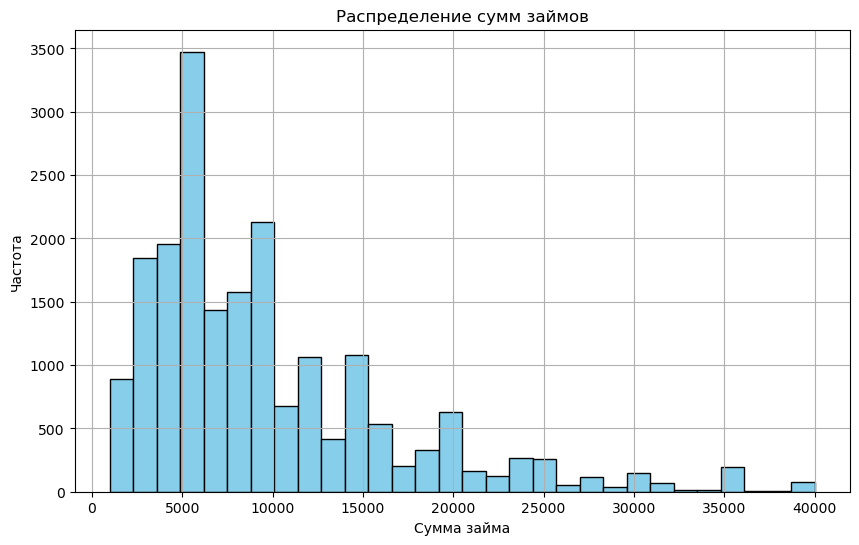

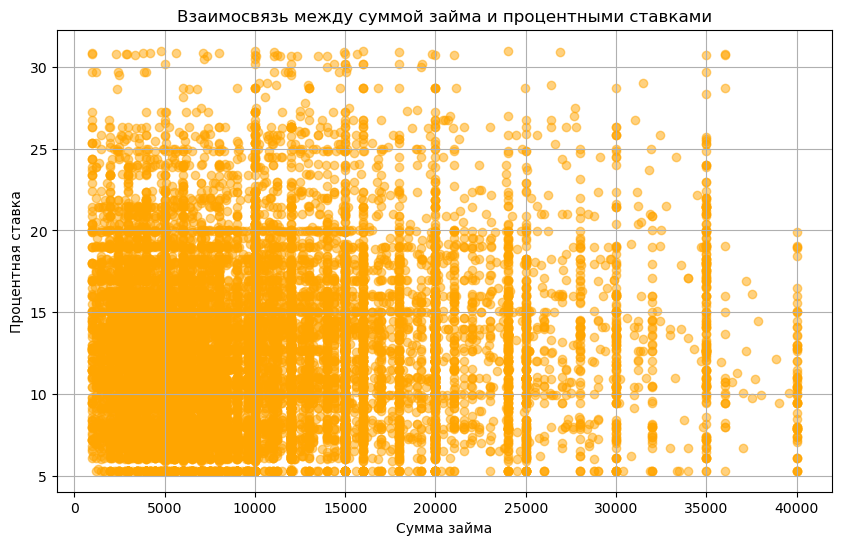

In [11]:
import matplotlib.pyplot as plt

# Создание гистограммы сумм займов
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение сумм займов')
plt.xlabel('Сумма займа')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Создание scatter plot для взаимосвязи между суммой займа и процентными ставками
plt.figure(figsize=(10, 6))
plt.scatter(df['loan_amnt'], df['int_rate'], color='orange', alpha=0.5)
plt.title('Взаимосвязь между суммой займа и процентными ставками')
plt.xlabel('Сумма займа')
plt.ylabel('Процентная ставка')
plt.grid(True)

plt.show()

In [13]:
df['term'] = df['term'].str.replace(' months', '')
df['term']

0         60
1         36
2         36
3         36
4         60
        ... 
19985     36
19986     60
19987     36
19988     36
19989     60
Name: term, Length: 19990, dtype: object

In [14]:
median_term = df['term'].median()

# Замена пропущенных значений в столбце 'term' на медиану
df['term'].fillna(median_term, inplace=True)

# Преобразование значений столбца 'term' в целочисленный формат
df['term'] = df['term'].astype(int)

In [15]:
df['term'].head(10)

0    60
1    36
2    36
3    36
4    60
5    36
6    36
7    60
8    36
9    60
Name: term, dtype: int32

In [17]:
df['emp_length']

0          2 years
1        10+ years
2           1 year
3        10+ years
4          9 years
           ...    
19985    10+ years
19986      4 years
19987    10+ years
19988      3 years
19989      3 years
Name: emp_length, Length: 19990, dtype: object

In [22]:
#Форматирование emp_length
df['emp_length'] = df['emp_length'].str.replace('< ', '').str.replace(' years', '').str.replace(' year', '').str.replace('+', '')

In [23]:
median_emp_length = df['emp_length'].median()

# Замена пропущенных значений в столбце 'emp_length' на медиану
df['emp_length'].fillna(median_emp_length, inplace=True)

# Преобразование значений столбца 'emp_length' в целочисленный формат
df['emp_length'] = df['emp_length'].astype(int)

In [25]:
df['emp_length']


0         2
1        10
2         1
3        10
4         9
         ..
19985    10
19986     4
19987    10
19988     3
19989     3
Name: emp_length, Length: 19990, dtype: int32

In [29]:
df['loan_status'].unique()

array(['charged off', 'fully paid', 'late (31-120 days)', 'current',
       'in grace period', 'late (16-30 days)', 'default'], dtype=object)

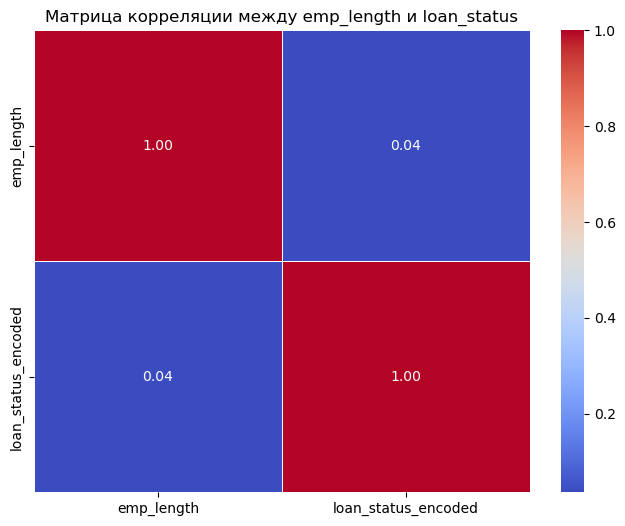

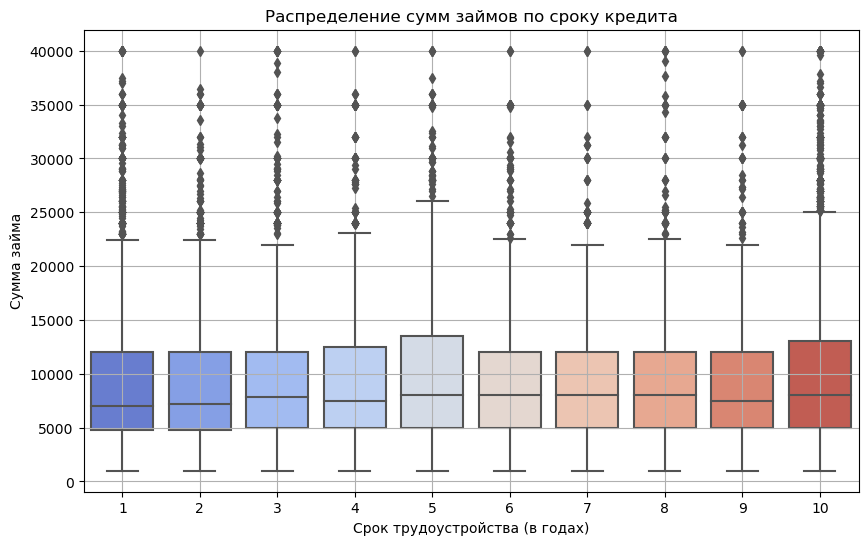

                     emp_length  loan_status_encoded
emp_length             1.000000             0.035994
loan_status_encoded    0.035994             1.000000


In [31]:
import seaborn as sns

# Закодировать категориальную переменную 'loan_status' в числовой формат
status_mapping = {'charged off': 0, 'fully paid': 1, 'late (31-120 days)': 2, 'current': 3, 
                  'in grace period': 4, 'late (16-30 days)': 5, 'default': 6}
df['loan_status_encoded'] = df['loan_status'].map(status_mapping)

# Построить матрицу корреляции
correlation_matrix = df[['emp_length', 'loan_status_encoded']].corr()

# Построить heatmap для визуализации матрицы корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции между emp_length и loan_status')
plt.show()

# Построить boxplot для распределения сумм займов по сроку кредита
plt.figure(figsize=(10, 6))
sns.boxplot(x='emp_length', y='loan_amnt', data=df, palette='coolwarm')
plt.title('Распределение сумм займов по сроку кредита')
plt.xlabel('Срок трудоустройства (в годах)')
plt.ylabel('Сумма займа')
plt.grid(True)
plt.show()

print(correlation_matrix)